In [27]:
import multiprocessing
import os
from typing import Iterable

import numpy as np
from numpy import ndarray
from skimage import io
from skimage import transform
from skimage.color import rgb2hsv
from skimage.feature import hog
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
cpus = multiprocessing.cpu_count()

In [13]:
def read_images_from_path(path: str) -> tuple[ndarray, ndarray]:
    x = []
    labels = []
    for dir_name in os.listdir(path):
        for f_name in os.listdir(os.path.join(path, dir_name)):
            img = io.imread(os.path.join(path, dir_name, f_name))
            img = transform.resize(img, (40, 40, 3), preserve_range=True).astype(np.uint8)
            img = rgb2hsv(img)
            x.append(img)
            labels.append(dir_name)
    x = np.array(x)
    labels = np.array(labels)
    return x, labels

In [14]:
train_path = 'Images/polishDataset/train'
x_train, y_train = read_images_from_path(train_path)
test_path = 'Images/polishDataset/test'
x_test, y_test = read_images_from_path(test_path)

In [17]:
def get_hog_descriptors(images: Iterable) -> ndarray:
    descriptors = []
    for image in images:
        h = hog(image[:, :, 0], orientations=8, pixels_per_cell=(5, 5), cells_per_block=(8, 8))
        s = hog(image[:, :, 1], orientations=8, pixels_per_cell=(5, 5), cells_per_block=(8, 8))
        v = hog(image[:, :, 2], orientations=8, pixels_per_cell=(5, 5), cells_per_block=(8, 8))
        descriptor = np.concatenate((h, s, v))
        descriptors.append(descriptor)

    return np.array(descriptors)

In [18]:
train_descriptors = get_hog_descriptors(x_train)
test_descriptors = get_hog_descriptors(x_test)

In [19]:
model = RandomForestClassifier(n_estimators=200, n_jobs=cpus//2)

In [20]:
model.fit(train_descriptors, y_train)

RandomForestClassifier(n_estimators=200, n_jobs=8)

In [21]:
preds = model.predict(test_descriptors)

In [22]:
print(f'Acc Score = {accuracy_score(y_test, preds)}')
print(f'Bal Acc Score = {balanced_accuracy_score(y_test, preds, adjusted=True)}')

Acc Score = 0.9092601209865053
Bal Acc Score = 0.7100439214688076


In [ ]:
cm = confusion_matrix(y_test, preds)


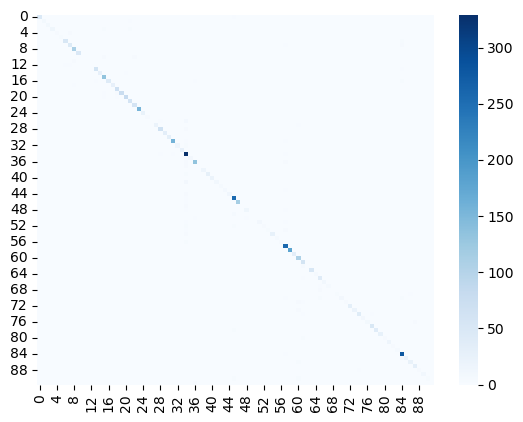

In [30]:
sns.heatmap(cm, cmap="Blues")
plt.show()